# Implementing Linear Regression in Sci-Kit Learn
Now that we understand how linear regression works, let's implement the model using the Boston dataset. 

## Loading Datasets for Predictive Models
For linear regression, and many other predictive models, we load our datasets a little differently than we have before. 

### Feature vs Targets
We pull in all the features (X, independent variables) as one dataframe, and the targets (Y, dependent class labels) as another. This allows us to easily transform the features as needed, without impacting the targets. 

### Training vs Testing
Additionally, we hold aside 20 to 30% of both the X and Y datasets for testing purposes. We'll train our model using the bulk of our dataset, but the model needs to be tested on data points it has never seen before to verify how well it will work on future predictions. 

First we'll pull in the boston dataset from sklearn: 

In [39]:
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

# load boston dataset
boston = load_boston()

#### Load Features (X) Dataset

In [15]:
df_x = pd.DataFrame(boston.data,
                 columns=boston.feature_names)

In [16]:
df_x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### Load Target (Y) Dataset

In [17]:
df_y = pd.DataFrame(boston.target,
                 columns=["Price"])

In [18]:
df_y.head()

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


#### Split into Training and Test Sets
We'll use [sklearn's train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to hold aside a specified percent of our dataset for testing after we finish training the model. 

We need to set aside the same percentage from our features and target datasets. Sklearn does the job of pulling out matching information from both datsaets. 

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, 
                                                   test_size=0.2, 
                                                   random_state=42)

Now we put aside `x_test` and `y_test` and forget about them until we're ready for testing. From here on out we'll just be working with `x_train` and `y_train`. 

## Instantiating the linear model
Now we'll instantiate (define) our linear model with [sklearn's LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) so that we can start training the model on our dataset.

This model has the following standard options: 
- fit_intercept: whether to calculate the intercept for this model. Default = True.
- normalize: f True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use sklearn.preprocessing.StandardScaler before calling fit on an estimator with normalize=False.
- n_jobs : int or None, optional (default=None). The number of jobs to use for the computation. 

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True,
                        n_jobs=4)

## Training the model (fit)
Now that we've setup the model, we can train it on our training datsets using the syntax `model.fit(x,y)`: 

In [24]:
fit = model.fit(x_train, y_train)

We can now pull out all the learned values of our model: 

In [33]:
print("Model Results: \n **Intercept**: {} \n **Coefficients**: {}, \n ".format(fit.intercept_, 
    fit.coef_))

Model Results: 
 **Intercept**: [30.24675099] 
 
 **Coefficients**: [[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
  -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
   2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
  -5.08571424e-01]], 
 


Regression coefficients represent the mean change in the response variable for one unit of change in the predictor variable (slope) while holding other predictors in the model constant. 

## Making predictions
Now that we've setup and trained our model, we'll make predictions on our x_test set so that we can measure error in our model: 

In [34]:
preds = model.predict(x_test)

In [36]:
preds[0:5]

array([[28.99672362],
       [36.02556534],
       [14.81694405],
       [25.03197915],
       [18.76987992]])

You can see that we get back a list of predicted values for housing in each row. Let's plot the predictions vs actual values: 

Text(0, 0.5, 'Predictions')

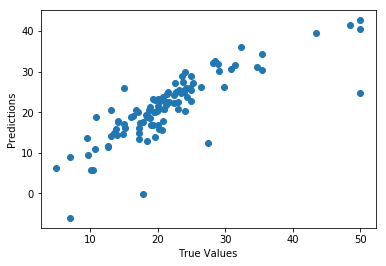

In [40]:
## plot predicted vs actual
plt.scatter(y_test, preds)
plt.xlabel("True Values")
plt.ylabel("Predictions")

Our model looks good- there is a strong linear trend between our actual and predicted values. 

Let's examine the model score on the testing data: 

In [47]:
"Accuracy Score: {}".format(model.score(x_test, y_test))

'Accuracy Score: 0.6687594935356329'

Not bad, but there are many things we can do to improve the results: 
- standardize and/or scale data
- find and remove outliers
- pull out only relevant features

For future reference, we can also use a method called K-folds cross validation: 
https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6